### RFM :is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## lode data

In [4]:
#loading the data
import os
pre=os.path.dirname(os.path.realpath("c::Global_Superstore.xlsx"))
fname= "Global_Superstore.xlsx"
path=os.path.join(pre,fname)

data=pd.read_excel("C:\\Users\\mnmnm\\Desktop\\Global_Superstore.xlsx")
df=pd.DataFrame(data)



## Data Wrangling

> load the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties


In [5]:
#show data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
#show data
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,2/12/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22-05-2012,26-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [9]:
#checking null values
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
#checking duplicated rows
df.duplicated().sum()

0

In [11]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

### Data Cleaning


In [12]:
#Removing Duplicated records
filteried_df=df[['Country','Customer ID']].drop_duplicates()

## Exploratory Data Analysis



<AxesSubplot:>

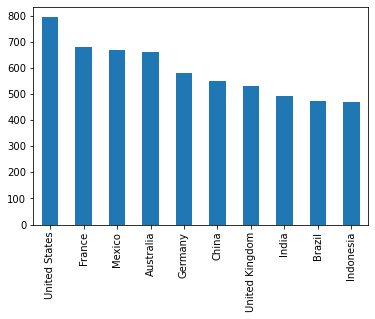

In [13]:
#top ten countries customer
filteried_df.Country.value_counts()[:10].plot(kind='bar')

In [14]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [15]:
df=df[df['Quantity']>0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [16]:
#filter required columns
df= df[['Customer ID','Order Date','Sales','Order ID']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].max(),df['Order Date'].min()

(Timestamp('2014-12-31 00:00:00'), Timestamp('2011-01-01 00:00:00'))

In [17]:
#TO find recency
Present= dt.datetime(2021,11,1)


## RFM MODEL

In [18]:
rfm = df.groupby('Customer ID').agg({'Order Date':lambda
                                        date:(Present - date.max()).days,
                                       'Order ID': lambda num:len(num),
                                       'Sales':lambda prices: prices.sum()})
rfm.head()

,Order Date,Order ID,Sales
Customer ID,,,
AA-10315,2505,42,13747.41300
AA-10375,2503,42,5884.19500
AA-10480,2614,38,17695.58978
AA-10645,2523,73,15343.89070
AA-315,2499,8,2243.25600


In [19]:
#Change name of coloumns
rfm.columns = ['Recency','Frequency','Monetary']
rfm['Recency']=rfm['Recency'].astype(int)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,2505,42,13747.41300
AA-10375,2503,42,5884.19500
AA-10480,2614,38,17695.58978
AA-10645,2523,73,15343.89070
AA-315,2499,8,2243.25600


In [20]:
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4 , ['1','2','3','4'])
rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 4 , ['4','3','2','1'])
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 4 , ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
Customer ID,,,,,,
AA-10315,2505,42,13747.41300,1,2,1
AA-10375,2503,42,5884.19500,1,2,3
AA-10480,2614,38,17695.58978,4,2,1
AA-10645,2523,73,15343.89070,2,1,1
AA-315,2499,8,2243.25600,1,4,3


In [21]:
#concatenate all 3 = rfm score
rfm["RFM_SCORE"] = rfm['R_quartile'].astype(str)+rfm['F_quartile'].astype(str)+rfm['M_quartile'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_SCORE
Customer ID,,,,,,,
AA-10315,2505,42,13747.41300,1,2,1,121
AA-10375,2503,42,5884.19500,1,2,3,123
AA-10480,2614,38,17695.58978,4,2,1,421
AA-10645,2523,73,15343.89070,2,1,1,211
AA-315,2499,8,2243.25600,1,4,3,143


In [22]:
#Best Values of customers
RFM = rfm[rfm['RFM_SCORE'] == '111'].sort_values('Monetary',ascending=False)
RFM.head()


,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_SCORE
Customer ID,,,,,,,
GT-14710,2505,74,34471.89028,1,1,1,111
SE-20110,2506,75,29532.62502,1,1,1,111
ZC-21910,2500,84,28472.81926,1,1,1,111
SP-20920,2503,60,28124.21286,1,1,1,111
NF-18385,2504,65,28044.35950,1,1,1,111
